# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as k
from tqdm.notebook import tqdm

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

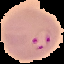

In [3]:
load_img("R:\PROJECTS\DEEP LEARNING PROJS\Malarial Cell Image Data\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png",target_size=(64,64))

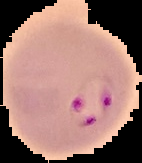

In [4]:
load_img("R:\PROJECTS\DEEP LEARNING PROJS\Malarial Cell Image Data\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png")

In [5]:
os.environ['KERAS_BACKEND']='tensorflow'
np.random.seed(312)

In [6]:
image_dir= r'R:\PROJECTS\DEEP LEARNING PROJS\Malarial Cell Image Data\malarial_cell_image_data\cell_images\cell_images'
size=64
dataset=[]
label=[]

In [7]:
parasitized=os.listdir(image_dir+"\Parasitized")
parasitized=parasitized[:3000]
for i,img_name in enumerate(tqdm(parasitized)):
    if(img_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+"\Parasitized"+"\\"+img_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(0)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [8]:
uninfected=os.listdir(image_dir+'\\noninfected')
uninfected=uninfected[:3000]

for i,img_name in enumerate(tqdm(uninfected)):
    if(img_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'\\noninfected'+'\\'+img_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(1)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [9]:
len(parasitized)

3000

In [10]:
len(uninfected)    

3000

In [12]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain,xtest,ytrain,ytest=train_test_split(dataset,to_categorical(np.array(label)),test_size=0.2,random_state=0)

In [15]:
len(xtrain)

4800

# CNN MODEL

In [17]:
INPUT_SHAPE=(size,size,3)
input=k.Input(shape=INPUT_SHAPE)

conv1=k.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(input)
pool1=k.MaxPool2D(pool_size=(2,2))(conv1)
norm1=k.BatchNormalization(axis=-1)(pool1)
drop1=k.Dropout(rate=0.2)(norm1)

conv2=k.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(drop1)
pool2=k.MaxPool2D(pool_size=(2,2))(conv2)
norm2=k.BatchNormalization(axis=-1)(pool2)
drop2=k.Dropout(rate=0.2)(norm2)

flat=k.Flatten()(drop2)

hidden1=k.Dense(512,activation="relu")(flat)
norm3=k.BatchNormalization(axis=-1)(hidden1)
drop3=k.Dropout(rate=0.2)(norm3)

hidden2=k.Dense(256,activation="relu")(drop3)
norm4=k.BatchNormalization(axis=-1)(hidden2)
drop4=k.Dropout(rate=0.2)(norm4)

out=k.Dense(2,activation='sigmoid')(drop4)


In [25]:
model=keras.Model(inputs=input,outputs=out)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248

In [26]:
history=model.fit(np.array(xtrain),ytrain,
                 batch_size=64,
                 verbose=1,
                 epochs=5,
                 validation_split=0.1,
                 shuffle=False)

Epoch 1/5
68/68 [==============================] - 28s 380ms/step - loss: 0.7314 - accuracy: 0.6845 - val_loss: 1.4750 - val_accuracy: 0.6896
Epoch 2/5
68/68 [==============================] - 25s 368ms/step - loss: 0.4413 - accuracy: 0.8016 - val_loss: 2.0394 - val_accuracy: 0.5833
Epoch 3/5
68/68 [==============================] - 24s 354ms/step - loss: 0.3257 - accuracy: 0.8678 - val_loss: 0.3835 - val_accuracy: 0.8500
Epoch 4/5
68/68 [==============================] - 22s 322ms/step - loss: 0.2131 - accuracy: 0.9171 - val_loss: 2.2689 - val_accuracy: 0.6375
Epoch 5/5
68/68 [==============================] - 21s 309ms/step - loss: 0.1732 - accuracy: 0.9306 - val_loss: 2.3820 - val_accuracy: 0.6979


In [35]:
    print("{:.2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100))

38/38 [==============================] - 2s 39ms/step - loss: 2.2559 - accuracy: 0.6958
69.58%
